In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import matplotlib.font_manager as fm

In [3]:
stk = pd.read_csv("동학개미운동 신규 고객 투자 정보.csv")
finance2103 = pd.read_csv("finance_data202103.csv")
finance2009 = pd.read_csv("finance_data202009.csv")
finance2003 = pd.read_csv("finance_data202003.csv")
finance1909 = pd.read_csv("finance_data201909.csv")
finance1903 = pd.read_csv("finance_data201903.csv")

In [4]:
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [5]:
finance1903["기준년월"]=pd.to_datetime(finance1903["기준년월"],format='%Y%m')
finance1909["기준년월"]=pd.to_datetime(finance1909["기준년월"],format='%Y%m')
finance2003["기준년월"]=pd.to_datetime(finance2003["기준년월"],format='%Y%m')
finance2009["기준년월"]=pd.to_datetime(finance2009["기준년월"],format='%Y%m')
finance2103["기준년월"]=pd.to_datetime(finance2103["기준년월"],format='%Y%m')

In [6]:
f_t=pd.concat([finance1903,finance1909,finance2003,finance2009,finance2003],axis=0)

In [7]:
f_t.shape

(1036618, 20)

In [8]:
f_t.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1036618 entries, 0 to 208935
Data columns (total 20 columns):
 #   Column    Non-Null Count    Dtype         
---  ------    --------------    -----         
 0   기준년월      1036618 non-null  datetime64[ns]
 1   지역구       1036618 non-null  object        
 2   법정동코드     1036618 non-null  int64         
 3   법정동       1036618 non-null  object        
 4   집계구코드     1036618 non-null  float64       
 5   나이        1036618 non-null  int64         
 6   성별        1036618 non-null  int64         
 7   직장인여부     1036618 non-null  int64         
 8   급여입금      1036618 non-null  int64         
 9   가맹점매출입금   1036618 non-null  int64         
 10  연금입금      1036618 non-null  int64         
 11  총소비금액     1036618 non-null  int64         
 12  총수신금액     1036618 non-null  int64         
 13  예적금금액     1036618 non-null  int64         
 14  신탁금액      1036618 non-null  int64         
 15  수익증권금액    1036618 non-null  int64         
 16  신용대출금액    1036618 n

In [9]:
f23=f_t[(f_t["나이"]==2 )|(f_t['나이']==3)]

In [10]:
f23.shape

(359513, 20)

In [11]:
f23.head()

,기준년월,지역구,법정동코드,법정동,집계구코드,나이,성별,직장인여부,급여입금,가맹점매출입금,연금입금,총소비금액,총수신금액,예적금금액,신탁금액,수익증권금액,신용대출금액,담보대출금액,주택대출금액,전세자금대출금액
0,2019-03-01,강남구,11680101,역삼동,1.123060e+12,2,1,0,0,0,0,2018319,2430312,0,0,0,0,0,0,0
1,2019-03-01,강남구,11680101,역삼동,1.123060e+12,2,2,0,0,0,0,2326837,2221251,0,0,0,0,0,0,0
2,2019-03-01,강남구,11680101,역삼동,1.123060e+12,3,1,0,0,0,0,1771639,1382057,1841250,0,0,0,0,0,0
3,2019-03-01,강남구,11680101,역삼동,1.123060e+12,3,2,0,0,0,0,1745601,2902578,3561440,0,0,0,0,0,0
12,2019-03-01,강남구,11680101,역삼동,1.123060e+12,2,1,0,0,0,0,1165127,3819592,0,0,0,0,0,0,0


In [12]:
f23[['총소비금액','총수신금액','예적금금액','신탁금액','수익증권금액','신용대출금액','담보대출금액','주택대출금액','전세자금대출금액']].describe()

,총소비금액,총수신금액,예적금금액,신탁금액,수익증권금액,신용대출금액,담보대출금액,주택대출금액,전세자금대출금액
count,3.595130e+05,3.595130e+05,3.595130e+05,3.595130e+05,3.595130e+05,3.595130e+05,3.595130e+05,3.595130e+05,3.595130e+05
mean,1.099150e+06,3.162961e+06,3.106457e+06,5.394705e+04,3.183556e+04,4.442802e+05,1.757417e+06,2.664192e+04,6.500349e+05
std,7.970045e+05,2.826916e+06,4.156697e+06,9.366598e+05,6.857362e+05,4.487603e+06,1.356838e+07,2.400053e+06,8.604668e+06
min,0.000000e+00,8.250000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.431300e+05,1.318830e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.108167e+06,2.395343e+06,1.380000e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.606889e+06,4.002081e+06,5.073750e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,5.534179e+06,3.337918e+07,4.446700e+07,6.677483e+07,5.770348e+07,1.037116e+08,2.896553e+08,3.131393e+08,2.052857e+08


#### 0값이 너무 많은 예적금금액	신탁금액	수익증권금액	신용대출금액	담보대출금액	주택대출금액	전세자금대출금액은 0이 아닌값을 골라놓은 다음에 분석해야할 듯

### 살펴보기전 (NA-> 0)값이 너무 많아 따로 분리하고 보려함

In [13]:
f23_not0_대출123123= f23[(f23['신용대출금액']!=0)&(f23['담보대출금액']!=0)&(f23['전세자금대출금액']!=0)]

In [14]:
f23_not0_대출1231232=f23_not0_대출123123[['신용대출금액','담보대출금액','전세자금대출금액']]

In [15]:
f23_not0_대출1231232.corr(method='pearson')

,신용대출금액,담보대출금액,전세자금대출금액
신용대출금액,1.000000,0.207303,0.153872
담보대출금액,0.207303,1.000000,0.865887
전세자금대출금액,0.153872,0.865887,1.000000


#### 담보대출금액과 전세자금 대출 금액의 상관관계가 높음 (0을 제외하고 봤을 때)

In [16]:
#f23_not0_대출   
# 5명밖에 없음

### 신용대출, 담보대출

In [17]:
f23_not0_대출= f23[(f23['신용대출금액']!=0)&(f23['담보대출금액']!=0)]

In [18]:
f23_not0_대출.shape

(1988, 20)

(array([ 69., 238., 685., 563., 270., 100.,  39.,  16.,   2.,   6.]),
 array([6.81791100e+06, 3.51016462e+07, 6.33853814e+07, 9.16691166e+07,
        1.19952852e+08, 1.48236587e+08, 1.76520322e+08, 2.04804057e+08,
        2.33087793e+08, 2.61371528e+08, 2.89655263e+08]),
 <BarContainer object of 10 artists>)

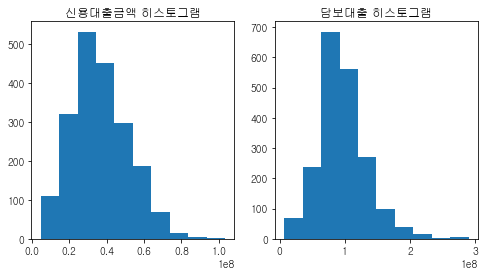

In [19]:
fig, (ax1, ax2)= plt.subplots(figsize=(8, 4), nrows=1, ncols=2)
ax1.set_title('신용대출금액 히스토그램')
ax1.hist(f23_not0_대출['신용대출금액'])

ax2.set_title('담보대출 히스토그램')
ax2.hist(f23_not0_대출['담보대출금액'])

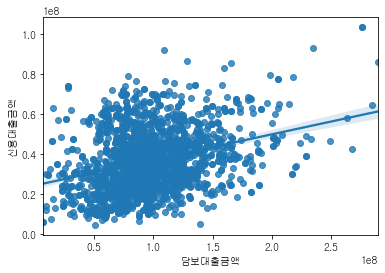

In [20]:
ax = plt.subplots( )
ax = sns.regplot(x='담보대출금액', y='신용대출금액', data=f23_not0_대출, fit_reg=True)

In [21]:
f23_not0_대출['담보대출금액'].corr(f23_not0_대출['신용대출금액'], method='pearson')

0.31395693110655387

#### 위에서 구한거랑 차이나는 이유는 여기서 구한 corr이 전세담보대출이 0인 경우도 포함돼있기 떄문에

### 전세자금대출금액, 주택대출금액

In [22]:
f23_not0_대출2= f23[(f23['전세자금대출금액']!=0)]

In [23]:
f23_not0_대출2.shape

(2194, 20)

(array([ 22.,  58., 210., 596., 550., 345., 225., 128.,  40.,  20.]),
 array([2.29416660e+07, 4.11760708e+07, 5.94104756e+07, 7.76448804e+07,
        9.58792852e+07, 1.14113690e+08, 1.32348095e+08, 1.50582500e+08,
        1.68816904e+08, 1.87051309e+08, 2.05285714e+08]),
 <BarContainer object of 10 artists>)

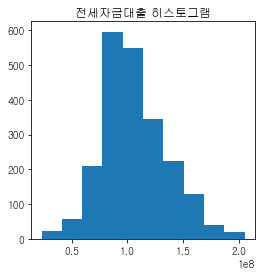

In [24]:
fig, ax= plt.subplots(figsize=(4, 4), nrows=1, ncols=1)
ax.set_title('전세자금대출 히스토그램')
ax.hist(f23_not0_대출2['전세자금대출금액'])

In [25]:
f23['주택대출금액'].unique()

array([        0, 135765241, 119202071, 192503298, 114922478, 136137272,
       173925008, 256421158,  91017776, 144355048, 162929429, 182813865,
       113363982, 128826227, 156686044, 181881401, 204417619, 170711036,
       210126205, 149375778, 165970744, 185270763, 173382200, 239885645,
       245466220, 284684825, 302153720, 291815534, 205788576, 143311899,
       187122501, 180669906, 240247057, 230114117, 275101734, 313139262,
       298366179, 276093169, 187125923], dtype=int64)

<AxesSubplot:>

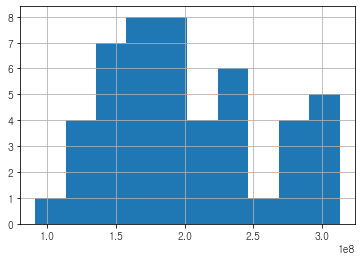

In [26]:
f23[f23['주택대출금액']!=0]['주택대출금액'].hist()

### 신탁금액, 수익증권금액
#### 신탁금액이라는 것의 뜻은 잘 모르겠지만, 재산을 이전시킨 정도를 의미하는것 아닐까 하는 생각을 가짐

In [27]:
f23_not0_신탁수익=f23[(f23['신탁금액']!=0)&(f23['수익증권금액']!=0)]


In [28]:
f23_not0_신탁수익.shape

(761, 20)

(array([419., 184.,  86.,  41.,  18.,   2.,   6.,   3.,   0.,   2.]),
 array([  218842. ,  5471371.9, 10723901.8, 15976431.7, 21228961.6,
        26481491.5, 31734021.4, 36986551.3, 42239081.2, 47491611.1,
        52744141. ]),
 <BarContainer object of 10 artists>)

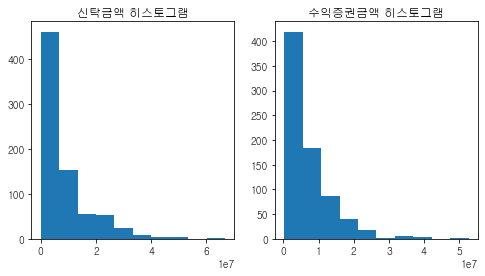

In [29]:
fig, (ax1, ax2)= plt.subplots(figsize=(8, 4), nrows=1, ncols=2)
ax1.set_title('신탁금액 히스토그램')
ax1.hist(f23_not0_신탁수익['신탁금액'])

ax2.set_title('수익증권금액 히스토그램')
ax2.hist(f23_not0_신탁수익['수익증권금액'])

In [30]:
f23_not0_신탁수익['수익증권금액'].corr(f23_not0_신탁수익['신탁금액'])

0.5816752640239897

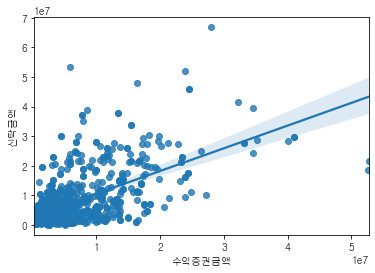

In [31]:
ax = plt.subplots( )
ax = sns.regplot(x='수익증권금액', y='신탁금액', data=f23_not0_신탁수익, fit_reg=True)

#### 수익증권. 신탁금액만 보면 둘이 어느정도 상관관계가 있다고 함..

### 총수신금액과 소비금액

In [32]:
f23_not0_소비수신=f23[(f23['총소비금액']!=0)&(f23['총수신금액'])!=0]

In [33]:
f23_not0_소비수신.shape

(140609, 20)

(array([8.9936e+04, 3.5568e+04, 8.9460e+03, 3.8790e+03, 1.4590e+03,
        5.8200e+02, 1.7200e+02, 5.5000e+01, 6.0000e+00, 6.0000e+00]),
 array([1.03290000e+04, 3.34721360e+06, 6.68409820e+06, 1.00209828e+07,
        1.33578674e+07, 1.66947520e+07, 2.00316366e+07, 2.33685212e+07,
        2.67054058e+07, 3.00422904e+07, 3.33791750e+07]),
 <BarContainer object of 10 artists>)

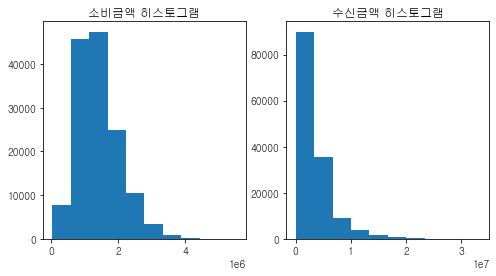

In [34]:
fig, (ax1, ax2)= plt.subplots(figsize=(8, 4), nrows=1, ncols=2)
ax1.set_title('소비금액 히스토그램')
ax1.hist(f23_not0_소비수신['총소비금액'])

ax2.set_title('수신금액 히스토그램')
ax2.hist(f23_not0_소비수신['총수신금액'])

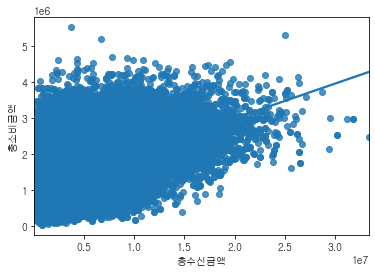

In [35]:
ax = plt.subplots( )
ax = sns.regplot(x='총수신금액', y='총소비금액', data=f23_not0_소비수신, fit_reg=True)

In [36]:
f23_not0_소비수신['총소비금액'].corr(f23_not0_소비수신['총수신금액'])

0.4597030236611823

In [37]:
f23.columns

Index(['기준년월', '지역구', '법정동코드', '법정동', '집계구코드', '나이', '성별', '직장인여부', '급여입금',
       '가맹점매출입금', '연금입금', '총소비금액', '총수신금액', '예적금금액', '신탁금액', '수익증권금액',
       '신용대출금액', '담보대출금액', '주택대출금액', '전세자금대출금액'],
      dtype='object')

In [38]:
f23.reset_index()
f23.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359513 entries, 0 to 208926
Data columns (total 20 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   기준년월      359513 non-null  datetime64[ns]
 1   지역구       359513 non-null  object        
 2   법정동코드     359513 non-null  int64         
 3   법정동       359513 non-null  object        
 4   집계구코드     359513 non-null  float64       
 5   나이        359513 non-null  int64         
 6   성별        359513 non-null  int64         
 7   직장인여부     359513 non-null  int64         
 8   급여입금      359513 non-null  int64         
 9   가맹점매출입금   359513 non-null  int64         
 10  연금입금      359513 non-null  int64         
 11  총소비금액     359513 non-null  int64         
 12  총수신금액     359513 non-null  int64         
 13  예적금금액     359513 non-null  int64         
 14  신탁금액      359513 non-null  int64         
 15  수익증권금액    359513 non-null  int64         
 16  신용대출금액    359513 non-null  int64      

### 2030 군집화

In [42]:
sml23= f23[['지역구','법정동','성별','직장인여부','급여입금','총소비금액','총수신금액','신탁금액','수익증권금액','신용대출금액']]

In [43]:
sml23.head()

,지역구,법정동,성별,직장인여부,급여입금,총소비금액,총수신금액,신탁금액,수익증권금액,신용대출금액
0,강남구,역삼동,1,0,0,2018319,2430312,0,0,0
1,강남구,역삼동,2,0,0,2326837,2221251,0,0,0
2,강남구,역삼동,1,0,0,1771639,1382057,0,0,0
3,강남구,역삼동,2,0,0,1745601,2902578,0,0,0
12,강남구,역삼동,1,0,0,1165127,3819592,0,0,0


In [44]:
sml23.describe()

,성별,직장인여부,급여입금,총소비금액,총수신금액,신탁금액,수익증권금액,신용대출금액
count,359513.000000,359513.000000,3.595130e+05,3.595130e+05,3.595130e+05,3.595130e+05,3.595130e+05,3.595130e+05
mean,1.497620,0.059625,1.821737e+05,1.099150e+06,3.162961e+06,5.394705e+04,3.183556e+04,4.442802e+05
std,0.499995,0.236791,7.467758e+05,7.970045e+05,2.826916e+06,9.366598e+05,6.857362e+05,4.487603e+06
min,1.000000,0.000000,0.000000e+00,0.000000e+00,8.250000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000,0.000000,0.000000e+00,5.431300e+05,1.318830e+06,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.000000,0.000000,0.000000e+00,1.108167e+06,2.395343e+06,0.000000e+00,0.000000e+00,0.000000e+00
75%,2.000000,0.000000,0.000000e+00,1.606889e+06,4.002081e+06,0.000000e+00,0.000000e+00,0.000000e+00
max,2.000000,1.000000,7.194817e+06,5.534179e+06,3.337918e+07,6.677483e+07,5.770348e+07,1.037116e+08


In [123]:
sml23['급여입금'].value_counts()
print(338077/len(sml23))
# 94%나 0
(1-(338077/len(sml23)))*len(sml23)
# 21436이 0이 아님

0.9403748960399206


21436.00000000001

In [72]:
sml23['총소비금액'].value_counts()
print(77814/len(sml23))

0.21644279900865893


In [100]:
def zero(x,val):
    if x==0:
        val+=1
    else:
        val+=0
    return val

In [107]:
zc=sml23['총수신금액'].apply(lambda x: zero(x,0))

In [114]:
from collections import Counter
gg=np.array(sml23['총수신금액'].tolist())
count = Counter(gg)
print(count[0]) 

0


#### 총수신금액은 0없는듯

In [117]:
sml23['신탁금액'].value_counts()
print(356435/len(sml23))

0.991438418082239


In [120]:
sml23['수익증권금액'].value_counts()
print(358053/len(sml23))

0.9959389507472609


In [122]:
sml23['신용대출금액'].value_counts()
print(355416/len(sml23))

0.9886040282270738


### sml123에서 0이 많이 없는 데이터만 뽑고  0필터링

In [124]:
sml23= f23[['지역구','법정동','성별','직장인여부','급여입금','총소비금액','총수신금액']]

In [126]:
sml23_2= sml23[(sml23['급여입금']!=0)&(sml23['총소비금액']!=0)]
sml23_2.shape

(21434, 7)

(array([1.022e+03, 4.500e+03, 6.866e+03, 5.256e+03, 2.391e+03, 9.690e+02,
        3.110e+02, 1.000e+02, 1.300e+01, 6.000e+00]),
 array([  429660. ,  3724611.5,  7019563. , 10314514.5, 13609466. ,
        16904417.5, 20199369. , 23494320.5, 26789272. , 30084223.5,
        33379175. ]),
 <BarContainer object of 10 artists>)

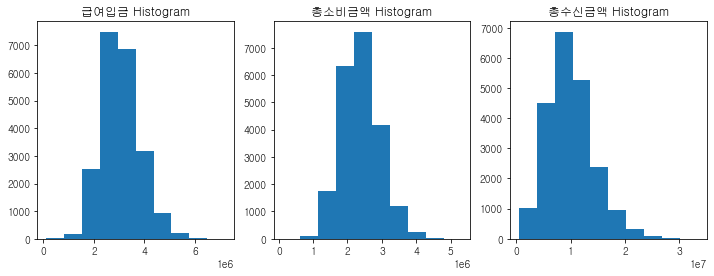

In [129]:
fig, (ax1, ax2, ax3)= plt.subplots(figsize=(12, 4), nrows=1, ncols=3)
ax1.set_title('급여입금 Histogram')
ax1.hist(sml23_2['급여입금'])

ax2.set_title('총소비금액 Histogram')
ax2.hist(sml23_2['총소비금액'])

ax3.set_title('총수신금액 Histogram')
ax3.hist(sml23_2['총수신금액'])

In [128]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

In [130]:
X_features= sml23_2[['급여입금','총소비금액','총수신금액']].values
X_features_scaled=StandardScaler().fit_transform(X_features)
# 잘몰라서 일단 연속형 변수만 선택함

In [134]:
kmeans=KMeans(n_clusters=5, random_state=0)
labels=kmeans.fit_predict(X_features_scaled)
sml23_2['cluster_label']=labels

<ipython-input-134-a29514a55262>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sml23_2['cluster_label']=labels


In [135]:
print('실루엣 스코어 :{0:.3f}'.format(silhouette_score(X_features_scaled, labels)))

실루엣 스코어 :0.254


In [136]:
def visualize_silhouette(cluster_lists, X_features): 

    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math

    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)

    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):

        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

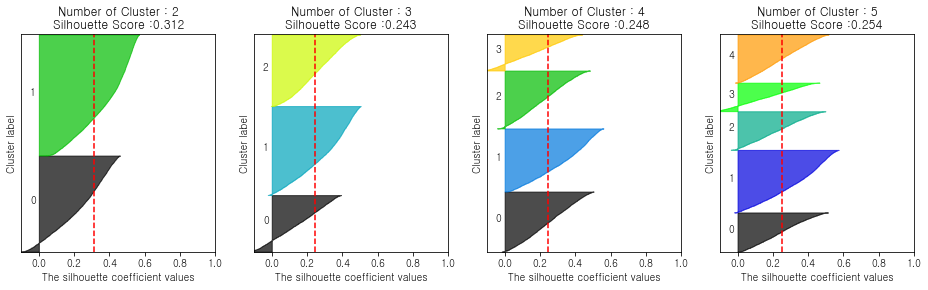

In [137]:
visualize_silhouette([2,3,4,5],X_features_scaled)

In [139]:
def visualize_kmeans_plot_multi(cluster_lists, X_features):
    
    from sklearn.cluster import KMeans
    from sklearn.decomposition import PCA
    import pandas as pd
    import numpy as np
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 만큼의 sub figures를 가지는 axs 생성 
    n_cols = len(cluster_lists)
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 입력 데이터의 FEATURE가 여러개일 경우 2차원 데이터 시각화가 어려우므로 PCA 변환하여 2차원 시각화
    pca = PCA(n_components=2)
    pca_transformed = pca.fit_transform(X_features)
    dataframe = pd.DataFrame(pca_transformed, columns=['PCA1','PCA2'])
    
     # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 KMeans 클러스터링 수행하고 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링으로 클러스터링 결과를 dataframe에 저장. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(pca_transformed)
        dataframe['cluster']=cluster_labels
        
        unique_labels = np.unique(clusterer.labels_)
        markers=['o', 's', '^', 'x', '*']
       
        # 클러스터링 결과값 별로 scatter plot 으로 시각화
        for label in unique_labels:
            label_df = dataframe[dataframe['cluster']==label]
            if label == -1:
                cluster_legend = 'Noise'
            else :
                cluster_legend = 'Cluster '+str(label)           
            axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,\
                        edgecolor='k', marker=markers[label], label=cluster_legend)

        axs[ind].set_title('Number of Cluster : '+ str(n_cluster))    
        axs[ind].legend(loc='upper right')
    
    plt.show()

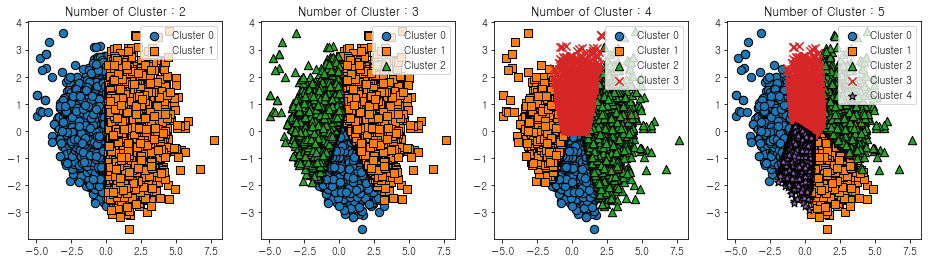

In [141]:
visualize_kmeans_plot_multi([2, 3, 4, 5], X_features_scaled)

### 동학개미 데이터

In [143]:
stk.head(2)

,고객구분코드,주문일자,고객성별구분코드,동일나이군구분코드,주소(시도),주문시간대,상품번호,상품명,거래소구분코드,매도매수구분코드,...,총체결금액,전일종가,당일시가,일중고가,일중저가,당일종가,거래수량,거래대금,상한가여부,하한가여부
0,A0001,20200128,1,30,경기,1,00000A091970,나노캠텍,3,2,...,75900,3215,3710,4125,3660,4095,17266597,6.732331e+10,N,N
1,A0001,20200130,1,30,경기,3,00000A045060,오공,3,2,...,154200,7690,8150,8380,7360,7920,15686931,1.250000e+11,N,N


In [144]:
stk["주문일자"]=pd.to_datetime(stk["주문일자"],format='%Y%m%d')

In [145]:
stk23=stk[(stk['동일나이군구분코드']==20)|(stk['동일나이군구분코드']==30)]

In [146]:
stk23.shape

(531716, 24)

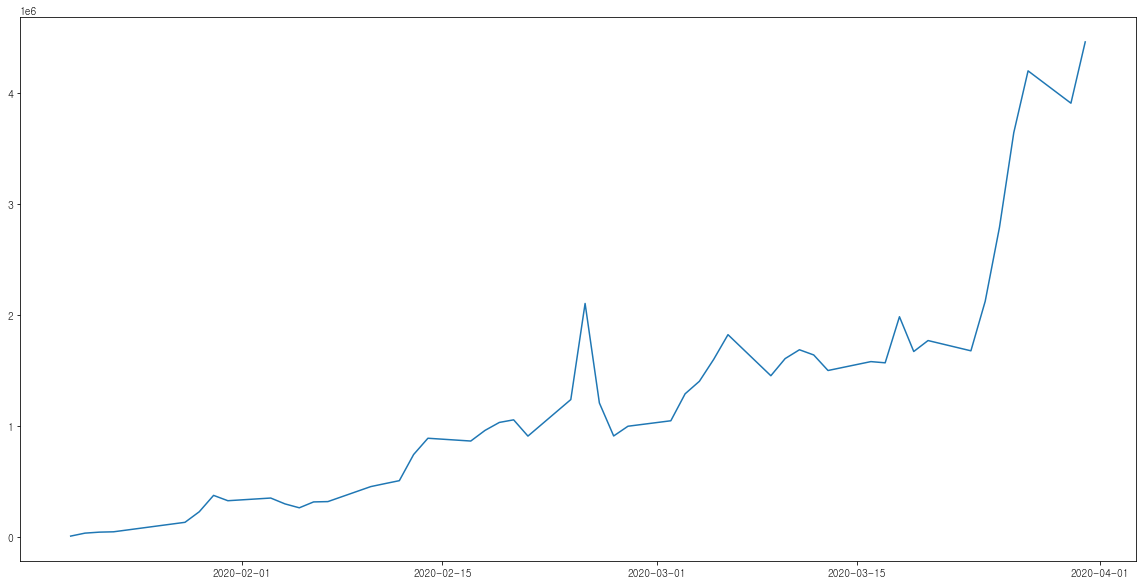

In [147]:
sktplt=stk23.groupby(by='주문일자').sum()
plt.figure(figsize=(20,10))
plt.plot(sktplt['주문수량'])
plt.show()

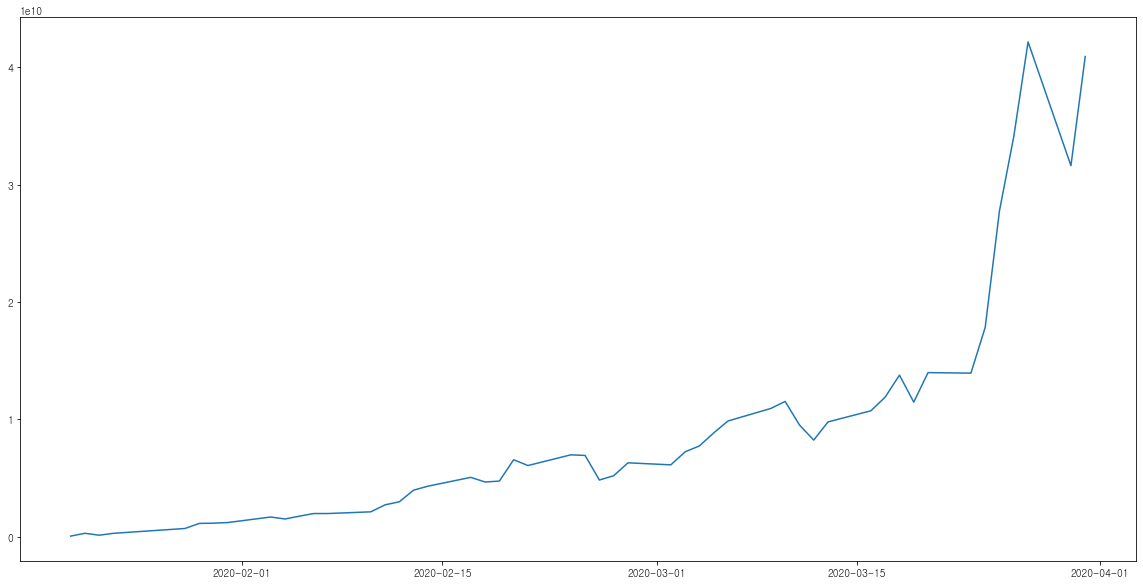

In [148]:
sktplt=stk23.groupby(by='주문일자').sum()
plt.figure(figsize=(20,10))
plt.plot(sktplt['총체결금액'])
plt.show()

In [149]:
def agecat(i):
    if i==20:
        return "이십삼십"
    elif i==30:
        return "이십삼십"
    elif i==40:
        return "사십오십"
    else:
        return "사십오십"

In [150]:
stk['catage']=stk['동일나이군구분코드'].apply(lambda x: agecat(x))

In [151]:
stk['catage'].unique()

array(['이십삼십', '사십오십'], dtype=object)

In [152]:
stk.columns

Index(['고객구분코드', '주문일자', '고객성별구분코드', '동일나이군구분코드', '주소(시도)', '주문시간대', '상품번호',
       '상품명', '거래소구분코드', '매도매수구분코드', '주문구분코드', '실주문단가', '주문수량', '총체결수량',
       '총체결금액', '전일종가', '당일시가', '일중고가', '일중저가', '당일종가', '거래수량', '거래대금',
       '상한가여부', '하한가여부', 'catage'],
      dtype='object')

In [154]:
stk2= stk.groupby(['주문일자','catage']).sum('총체결금액')
stk2.head()

고객성별구분코드  동일나이군구분코드  주문시간대  거래소구분코드  매도매수구분코드  주문구분코드  \
주문일자       catage                                                          
2020-01-20 사십오십          61       1540     93       83        66      41   
           이십삼십          94       1890    168      175       147      75   
2020-01-21 사십오십         152       4410    204      229       190     108   
           이십삼십         315       7010    512      656       481     452   
2020-01-22 사십오십         226       6350    292      342       259     167   

                     실주문단가   주문수량  총체결수량      총체결금액     전일종가     당일시가  \
주문일자       catage                                                       
2020-01-20 사십오십    1317514   1265   1265   23756043  1275476  1292638   
           이십삼십    2073641   4032   4032   45032197  2037363  2059773   
2020-01-21 사십오십    3341021  16175  16175   80989753  3366654  3363973   
           이십삼십    6988539  30680  30507  283662983  6560894  6541508   
2020-01-22 사십오십    3926842  15094  15094  135002566  3876238  3870606   

                      일중고가     일중저가     당일종가        거래수량          거래대금  
주문일자       catage                                                       
2020-01-20 사십오십    1325229  1283656  1312898   916167961  9.871661e+12  
           이십삼십    2117343  2035093  2066724   905622565  1.331124e+13  
2020-01-21 사십오십    3395395  3308025  3324344  1211282075  1.628032e+13  
           이십삼십    6724859  6398932  6538913  3909511859  2.756297e+13  
2020-01-22 사십오십    3995257  3843943  3957688  1407555165  1.737394e+13

In [155]:
stk23= stk[stk['catage']=='이십삼십']
stk45= stk[stk['catage']=='사십오십']

In [156]:
stk2_23=stk23.groupby(by='주문일자').mean()
stk2_45=stk23.groupby(by='주문일자').mean()

In [157]:
stk2_23['주문일자'] = stk2_23.index
stk2_45['주문일자'] = stk2_45.index

In [158]:
smlstk23=stk23[['실주문단가','주문수량','총체결수량','총체결금액','거래수량','거래대금']]
smlstk23.describe()

,실주문단가,주문수량,총체결수량,총체결금액,거래수량,거래대금
count,5.317160e+05,531716.000000,531716.000000,5.317160e+05,5.317160e+05,5.317160e+05
mean,3.040631e+04,119.175851,115.952021,8.407637e+05,1.706336e+07,2.763032e+11
std,5.463211e+04,483.075283,469.115807,2.615921e+06,4.114059e+07,5.285281e+11
min,3.500000e+01,1.000000,1.000000,5.900000e+01,2.600000e+01,5.819500e+04
25%,4.075000e+03,2.000000,2.000000,3.980000e+04,1.391892e+06,1.313373e+10
50%,1.000000e+04,10.000000,10.000000,1.433700e+05,6.760856e+06,7.031674e+10
75%,4.135000e+04,50.000000,50.000000,5.688000e+05,2.102320e+07,2.390000e+11
max,1.631000e+06,10372.000000,9999.000000,5.260000e+07,8.426287e+08,2.840000e+12


In [159]:
smlstk45=stk45[['실주문단가','주문수량','총체결수량','총체결금액','거래수량','거래대금']]
smlstk45.describe()

,실주문단가,주문수량,총체결수량,총체결금액,거래수량,거래대금
count,3.142240e+05,314224.000000,314224.000000,3.142240e+05,3.142240e+05,3.142240e+05
mean,3.692558e+04,180.740443,175.517004,1.519871e+06,1.319211e+07,2.779790e+11
std,6.620417e+04,595.523412,577.909270,3.899045e+06,2.894462e+07,5.502797e+11
min,3.300000e+01,1.000000,1.000000,9.000000e+01,1.600000e+02,7.885000e+05
25%,4.675000e+03,3.000000,3.000000,6.275000e+04,9.435142e+05,1.059517e+10
50%,1.345000e+04,17.000000,17.000000,2.885000e+05,4.285488e+06,6.004168e+10
75%,4.770000e+04,100.000000,100.000000,1.149000e+06,1.623049e+07,2.140000e+11
max,1.753000e+06,10389.000000,9988.000000,5.265750e+07,8.426287e+08,2.840000e+12


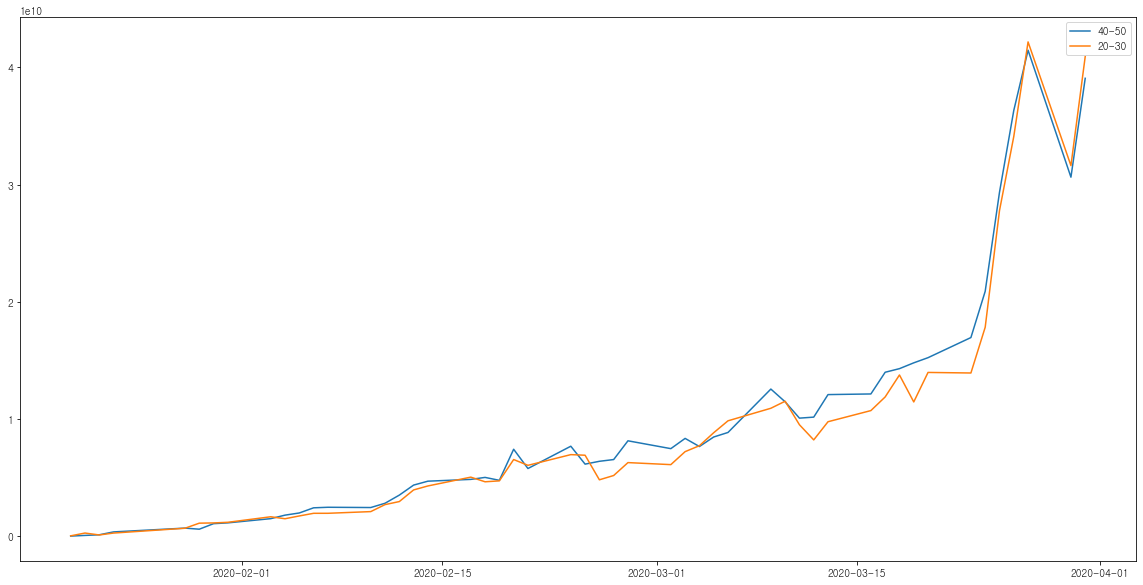

In [160]:
stk45_2=stk45.groupby(by='주문일자').sum()
stk23_2=stk23.groupby(by='주문일자').sum()
plt.figure(figsize=(20,10))
plt.plot( stk45_2['총체결금액'])
plt.plot( stk23_2['총체결금액'])
plt.legend(['40-50', '20-30'])
plt.show()

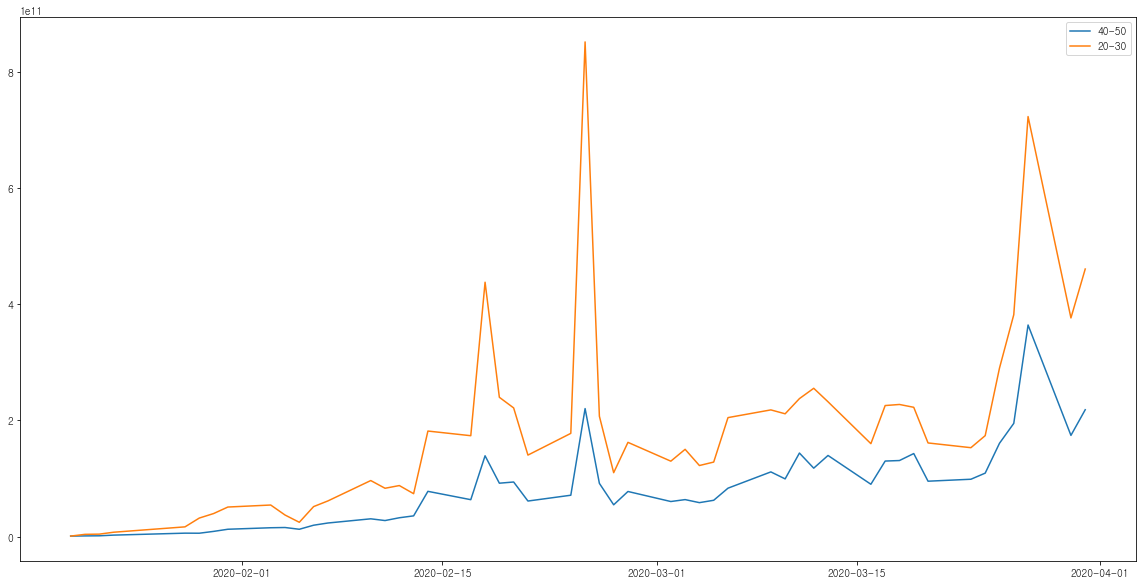

In [161]:
plt.figure(figsize=(20,10))
plt.plot( stk45_2['거래수량'])
plt.plot( stk23_2['거래수량'])
plt.legend(['40-50', '20-30'])
plt.show()

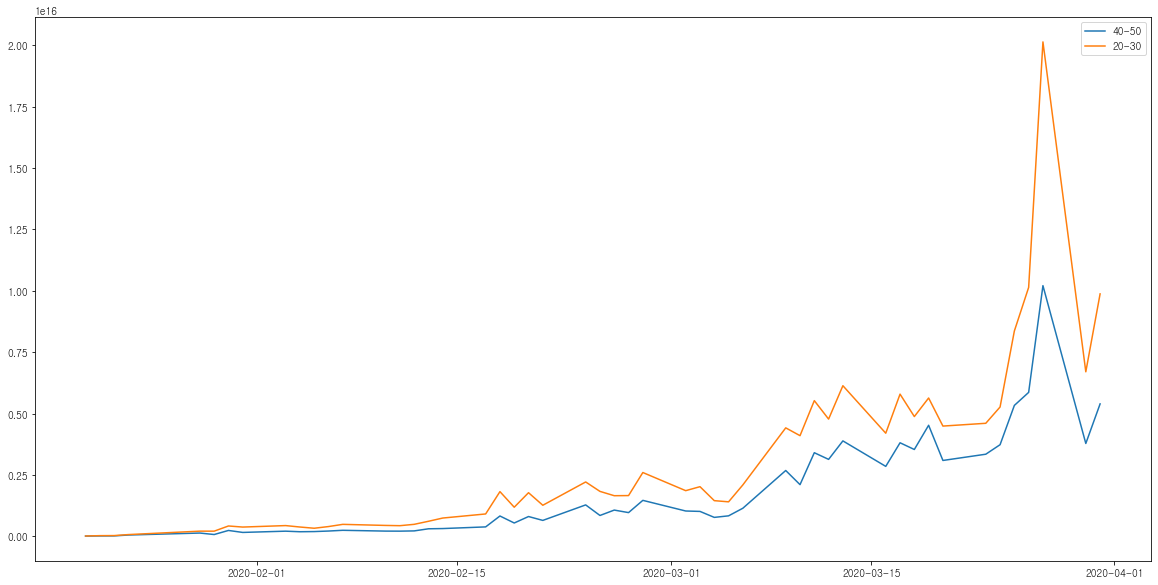

In [166]:
plt.figure(figsize=(20,10))
plt.plot( stk45_2['거래대금'])
plt.plot( stk23_2['거래대금'])
plt.legend(['40-50', '20-30'])
plt.show()

### 거래수량이 확실히 20-30대가 많아보임

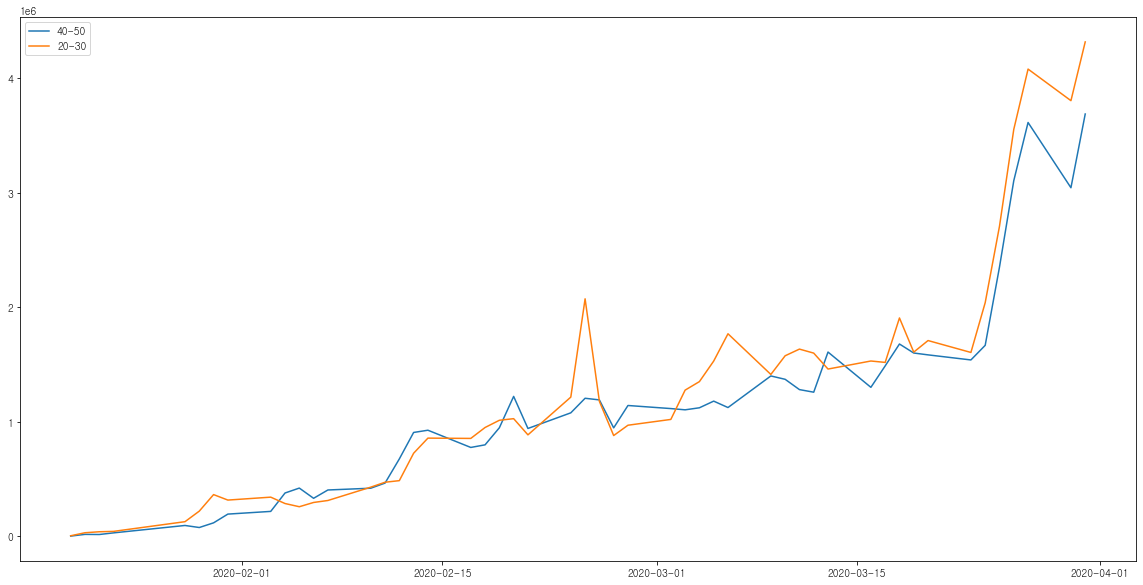

In [162]:
plt.figure(figsize=(20,10))
plt.plot( stk45_2['총체결수량'])
plt.plot( stk23_2['총체결수량'])
plt.legend(['40-50', '20-30'])
plt.show()

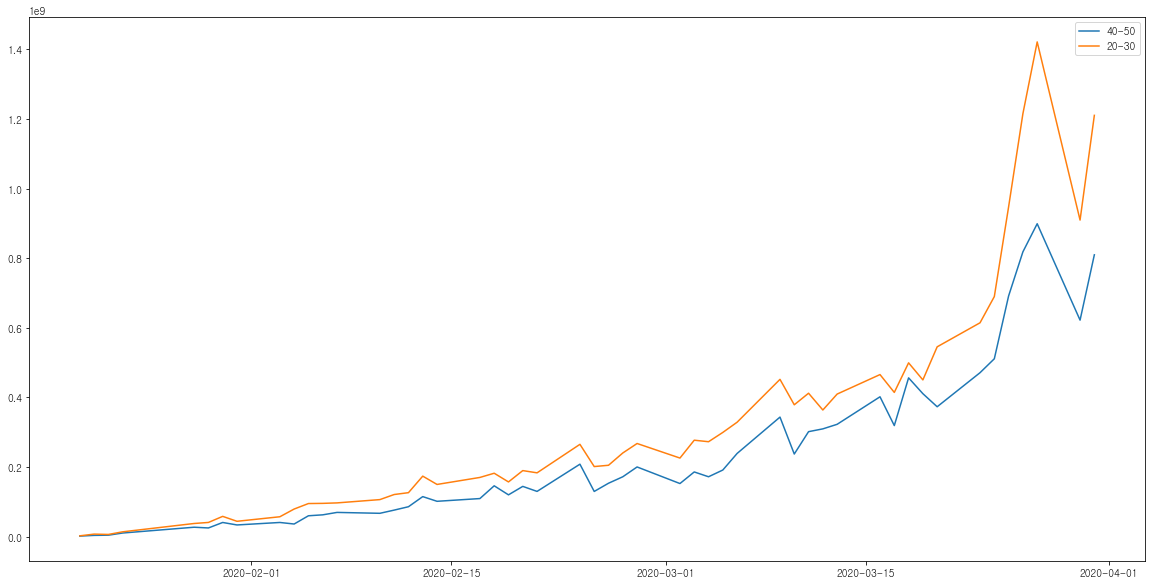

In [168]:
plt.figure(figsize=(20,10))
plt.plot( stk45_2['실주문단가'])
plt.plot( stk23_2['실주문단가'])
plt.legend(['40-50', '20-30'])
plt.show()

In [169]:
stk23.head()
stk23_clu= stk23[['총체결수량','거래수량','총체결금액','거래대금','실주문단가']]

In [174]:
stk23_clu.isna().sum()

총체결수량    0
거래수량     0
총체결금액    0
거래대금     0
실주문단가    0
dtype: int64

(array([5.17702e+05, 1.15950e+04, 1.66700e+03, 4.55000e+02, 1.05000e+02,
        6.00000e+00, 1.01000e+02, 6.90000e+01, 1.40000e+01, 2.00000e+00]),
 array([3.5000000e+01, 1.6313150e+05, 3.2622800e+05, 4.8932450e+05,
        6.5242100e+05, 8.1551750e+05, 9.7861400e+05, 1.1417105e+06,
        1.3048070e+06, 1.4679035e+06, 1.6310000e+06]),
 <BarContainer object of 10 artists>)

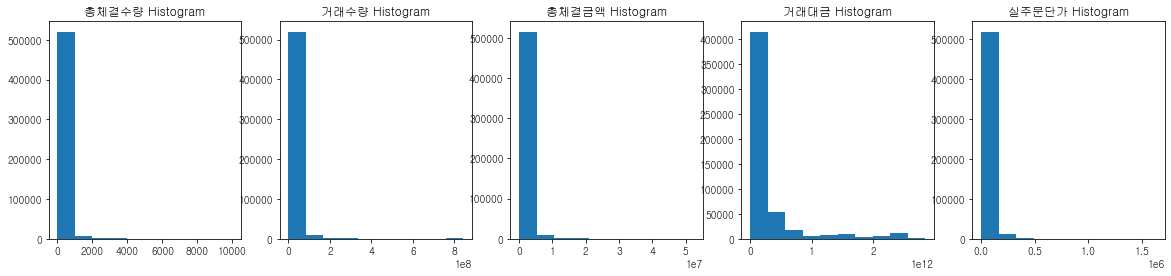

In [175]:
fig, (ax1, ax2, ax3, ax4, ax5)= plt.subplots(figsize=(20, 4), nrows=1, ncols=5)
ax1.set_title('총체결수량 Histogram')
ax1.hist(stk23_clu['총체결수량'])

ax2.set_title('거래수량 Histogram')
ax2.hist(stk23_clu['거래수량'])

ax3.set_title('총체결금액 Histogram')
ax3.hist(stk23_clu['총체결금액'])

ax4.set_title('거래대금 Histogram')
ax4.hist(stk23_clu['거래대금'])

ax5.set_title('실주문단가 Histogram')
ax5.hist(stk23_clu['실주문단가'])

In [176]:
X_features= stk23_clu[['총체결수량','거래수량','총체결금액','거래대금','실주문단가']].values
X_features_scaled=StandardScaler().fit_transform(X_features)

In [1]:
# visualize_silhouette([2,3,4],X_features_scaled)

In [2]:
#medoid  clustering

## 최종 사용했던 분석은 R을 이용한 cluster분석임